In [37]:
%pip install pandas
%pip install sklearn
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [39]:
iris = pd.read_csv('iris.csv')
iris_test = pd.read_csv('test_iris.csv')
result_records = pd.read_csv('result_records.csv', header=None, names=['pca1', 'pca2'])
result_targets = pd.read_csv('result_targets.csv', header=None, names=['clusters'])

In [40]:
scaler = StandardScaler().fit(iris_test)
iris_scaler = scaler.transform(iris_test)

pca = PCA(n_components=2).fit(iris_scaler)
iris_pca = pca.transform(iris_scaler)

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(iris_pca)
iris_kmeans = kmeans.predict(iris_pca)

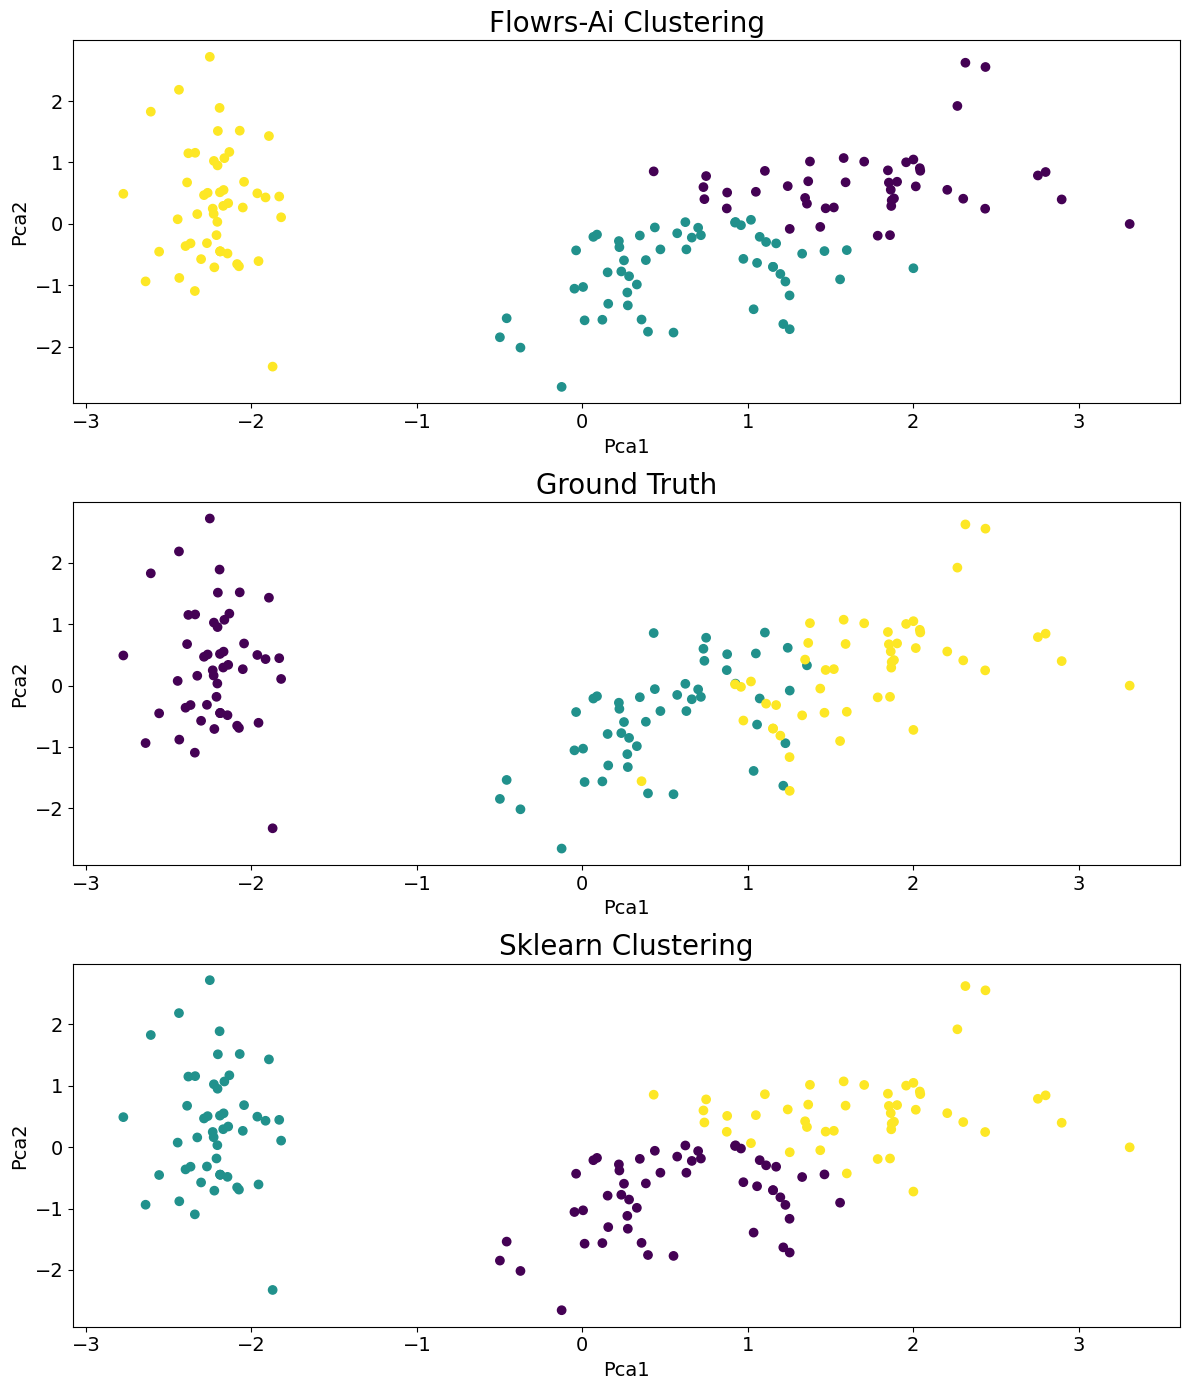

In [51]:
plt.figure(figsize=(12,14))
plt.subplot(3, 1, 1)
plt.title('Flowrs-Ai Clustering', fontsize=20)
plt.scatter(result_records['pca1'], result_records['pca2'], c=result_targets['clusters'])
plt.xlabel('Pca1', fontsize=14)
plt.ylabel('Pca2', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.subplot(3, 1, 2)
plt.title('Ground Truth', fontsize=20)
plt.scatter(result_records['pca1'], result_records['pca2'], c=iris['species'].map({'setosa': 1, 'versicolor': 2, 'virginica': 3}))
plt.xlabel('Pca1', fontsize=14)
plt.ylabel('Pca2', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.subplot(3, 1, 3)
plt.title('Sklearn Clustering', fontsize=20)
plt.scatter(iris_pca[:,0], iris_pca[:,1], c=iris_kmeans)
plt.xlabel('Pca1', fontsize=14)
plt.ylabel('Pca2', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()

In [ ]:
scaling_nodes = ['l1normscaler', 'l2normscaler', 'maxnormscaler', 'standardscaler', 'minmaxscaler', 'minmaxrangescaler', 'maxabsscaler']